## Pitney Bowes Data Challenge_Team 2 (Noni)

### Import Data and Check

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/Users/NONI/Desktop/SMOTE_dataset_with_Aggegation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62198 entries, 0 to 62197
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         62198 non-null  int64  
 1   charge_cycle_time_below_12         62198 non-null  bool   
 2   chargecycles                       62198 non-null  float64
 3   dischargecycles                    62198 non-null  float64
 4   total_off_time                     62198 non-null  float64
 5   number_times_restart               62198 non-null  float64
 6   avg_volt_change_charging           62198 non-null  float64
 7   avg_volt_change_discharging        62198 non-null  float64
 8   max_voltage_day                    62198 non-null  float64
 9   piececount                         62198 non-null  float64
 10  cycle_time                         62198 non-null  float64
 11  Days                               62198 non-null  int

In [4]:
df.head()

,Unnamed: 0,charge_cycle_time_below_12,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,max_voltage_day,piececount,cycle_time,Days,avg_charge_time_for_all_lags,avg_discharge_time_for_all_lags,avg_charging_rate_for_all_lags,avg_discharging_rate_for_all_lags,fail_7
0,0,False,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,4174.875000,14.200000,60.701250,543,14.052417,22.844333,-0.398333,0.121111,0
1,1,False,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,4161.000000,19.777778,52.097143,522,17.538905,27.494238,-0.235833,-1.671667,0
2,2,False,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,4152.238095,19.200000,34.146667,518,14.409683,21.622095,-0.142500,-0.258333,0
3,3,False,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,4164.631579,23.625000,42.496316,548,15.316456,24.809298,0.125000,-0.008889,0
4,4,True,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,4169.800000,12.666667,49.609333,566,19.706489,32.489467,0.377500,-0.355000,0


In [5]:
# Covert to Datetime 
# Calculate days between LastRecord ~ DateDeployed

# df['LastRecord'] = pd.to_datetime(df['LastRecord'])
# df['Date Deployed'] = pd.to_datetime(df['Date Deployed'])

In [6]:
# Create a new column for the days

# df['days'] = df['LastRecord'] - df['Date Deployed']
# df['days'] = df['days'].dt.days.astype('int16')
# df['days']

In [7]:
# Check nums of rows and variables

nRow = df.shape[0]
nVar = df.shape[1]
print('nRow: %d' % nRow, 'nVar: %d' % nVar )

nRow: 62198 nVar: 17


In [8]:
# Remove non-related variables to SHAP value

df1 = df.drop(['Unnamed: 0'], axis = 1)
df1['charge_cycle_time_below_12']=df1['charge_cycle_time_below_12'].astype('category').cat.codes
df1['charge_cycle_time_below_12']

0        0
1        0
2        0
3        0
4        1
        ..
62193    1
62194    1
62195    1
62196    1
62197    1
Name: charge_cycle_time_below_12, Length: 62198, dtype: int8

In [9]:
# split our training and test sets

feature_col = list(df1.columns.difference(['fail_7']))
x=df1[feature_col]
y=df1['fail_7']

In [10]:
# split our train and test sets (8:2)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) 

(49758, 15) (12440, 15) (49758,) (12440,)


### LightGBM (Ensemble Learning, Gradient Boosting)
#### other option; 
Gradient Boosting: XGBoost, CatBoost / Bagging: Random Forest

In [11]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [12]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error

# # train data -> LightGBM model
# lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) 
# lgb_param = {'max_depth': 10, # Tree depth
#             'learning_rate': 0.01, # Step Size
#             'n_estimators': 1000, # Number of trees
#             'objective': 'regression'} #Regression?

# # Train Model
# lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
# # Model Prediction
# lgb_model_predict = lgb_model.predict(test_x)

# # Root Mean Square Error
# print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) 
##########################################################################################


# Accuracy is good measure when the target variable class in the data are nearly balanced.
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# train data -> LightGBM modeling
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) 
lgb_param = {"objective": "binary", "metric": "binary_logloss"} #Binary
lgb_model = lgb.train(lgb_param, lgb_dtrain)

y_pred = lgb_model.predict(test_x)

print("Test Accuracy score: {}".format(accuracy_score(test_y, y_pred>0.5)))

[LightGBM] [Info] Number of positive: 24824, number of negative: 24934
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 49758, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498895 -> initscore=-0.004421
[LightGBM] [Info] Start training from score -0.004421
Test Accuracy score: 0.7355305466237942


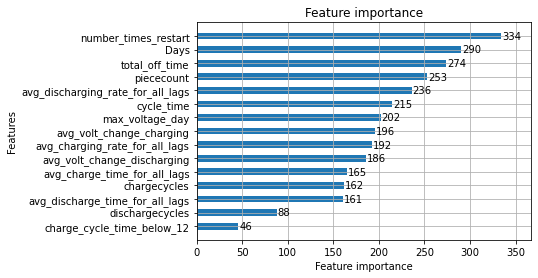

In [13]:
lgb.plot_importance(lgb_model, height=0.5, max_num_features=20)

### LightGBM & SHAP

In [14]:
import shap

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(test_x) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [15]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explaination with default colors in a force plot
#shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

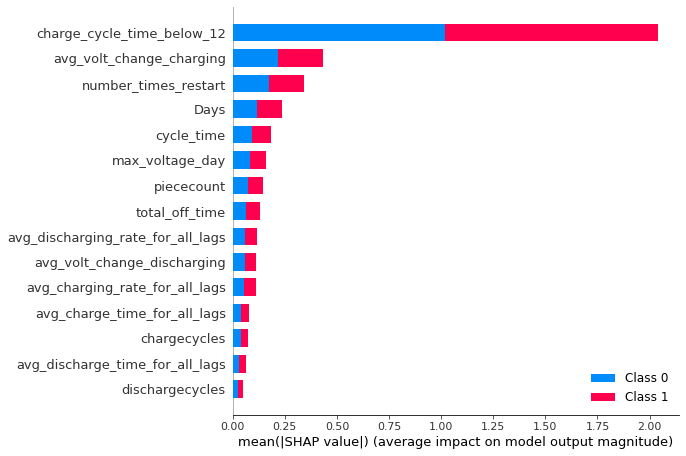

In [16]:
shap.summary_plot(shap_values, test_x, plot_type = "bar")

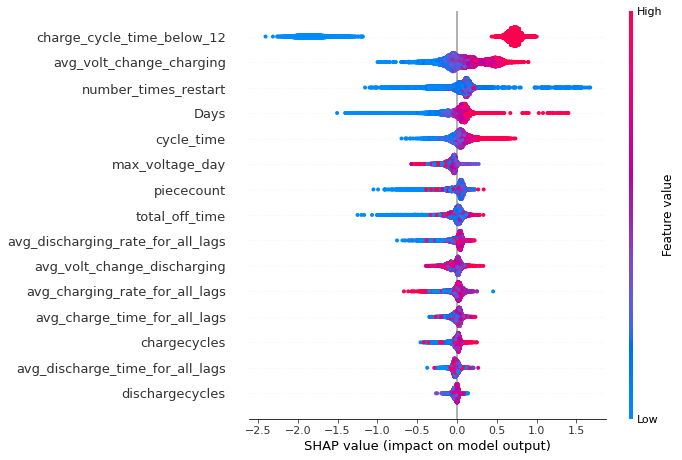

In [17]:
shap.summary_plot(shap_values[1], test_x, plot_type = "dot")

### Extra) Use Gradient Boosting Classifier & Feature Importance function

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=2, subsample=0.8)
gb_model.fit(train_x, train_y)

gb_pred=gb_model.predict(test_x)
gb_accuracy = accuracy_score(test_y, gb_pred>0.5)

In [19]:
print("train score: ", gb_model.score(train_x, train_y))
print("test score: ", gb_model.score(test_x, test_y))
print("GBM test Accuracy score: ",gb_accuracy)

train score:  0.7338920374613127
test score:  0.717282958199357
GBM test Accuracy score:  0.717282958199357


In [20]:
gb_model.feature_importances_

array([1.92011592e-02, 2.35298256e-04, 5.26874458e-03, 1.75769134e-03,
       7.32142835e-03, 5.25210929e-02, 4.37956331e-03, 8.22870427e-01,
       1.16833403e-03, 7.52525146e-03, 1.19265226e-03, 1.65112222e-03,
       4.33305500e-02, 1.29641874e-02, 1.86124977e-02])

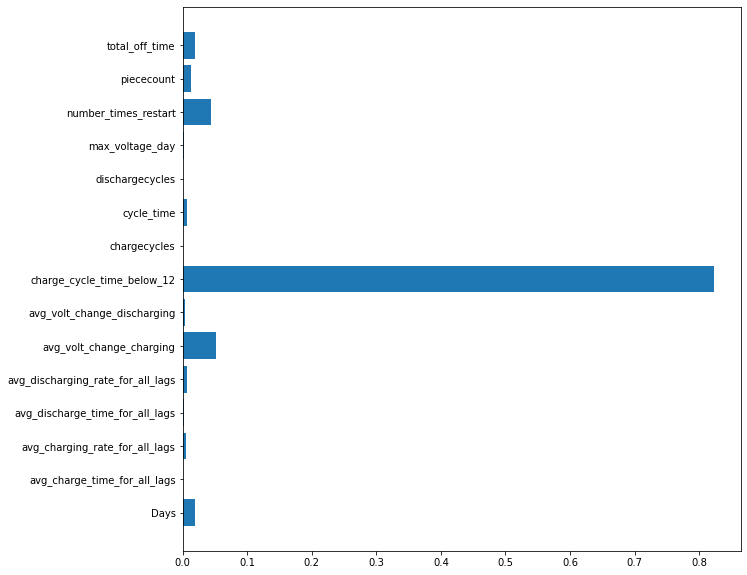

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
def plot_feature_importance(model):
    n_feature= x.shape[1]    
    plt.barh(range(n_feature), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_feature), x.columns)
    plt.show()

plot_feature_importance(gb_model)

### Extra) Use Decision Tree Classifier & SHAP

In [22]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

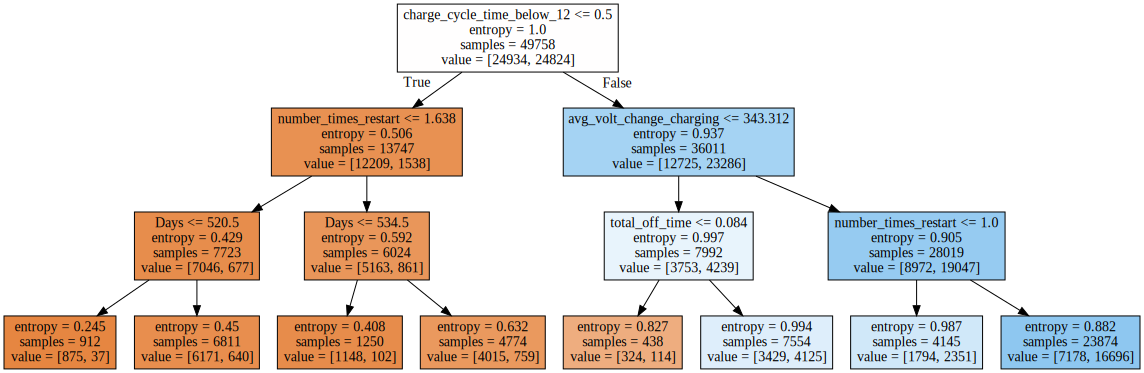

In [24]:
# develop a decision tree model
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
  
# train the model
model.fit(train_x, train_y)
# Visualize how model classified the entire data
tree_graph = export_graphviz(model, out_file=None, feature_names = x.columns, filled=True)
graphviz.Source(tree_graph) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


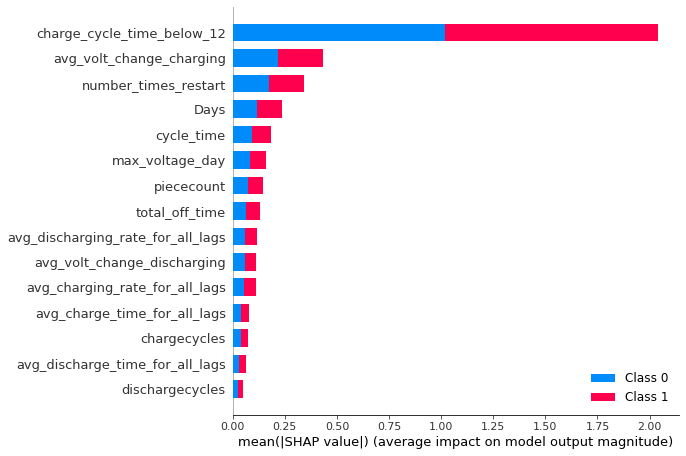

In [25]:
explainer1 = shap.TreeExplainer(model)
shap_values1 = explainer.shap_values(test_x)

shap.summary_plot(shap_values1, test_x, plot_type='bar')

In [26]:
pred_dt = model.predict(test_x)
accuracy_score(test_y, pred_dt>0.5)

0.7058681672025724

In [27]:
pip install lime

     |████████████████████████████████| 275 kB 9.1 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=057ee500d5d6a48ee362fcfaa6cde4a90f98f4beea5b29f2428dd0cf51befcff
  Stored in directory: /Users/NONI/Library/Caches/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


### Pipeline

In [29]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd 
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, f1_score, recall_score, accuracy_score, 
average_precision_score ,auc,roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier , StackingClassifier
from sklearn.model_selection import train_test_split

We have better score with Top10 features than Top5.

In [43]:
target = df1["fail_7"]
features = df1[["charge_cycle_time_below_12", 
                "avg_volt_change_charging", 
                "number_times_restart", 
                "Days", 
                "cycle_time", 
                "max_voltage_day", 
                "piececount", 
                "total_off_time", 
                "avg_discharging_rate_for_all_lags", 
                "avg_volt_change_discharging"]]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [44]:
def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
    
    '''
    Stores the result of trainer in its individual Key
    '''
    scores['auc'] = roc_auc_score(Y_test , trainer.predict_proba(X_test)[:,1])
    scores["AP-SCORE"]=average_precision_score(Y_test , trainer.predict_proba(X_test)[:,1])
    
    scores['Recall_test'] = recall_score(Y_test , Y_pred)
    
    scores['Precision_test'] = precision_score(Y_test , Y_pred)
    
    scores['F1_Score_test'] = f1_score(Y_test , Y_pred)
    
    
    return scores

In [45]:
xgb = XGBClassifier(random_state= 42)
rf = RandomForestClassifier(random_state= 42,class_weight='balanced')
gbm=GradientBoostingClassifier(random_state=42)
predictors = {} # Initializing a dictionary to store training and testing data
 
for model in [rf, gbm,xgb]:
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    pipe=make_pipeline(model)
    predictors[model_name] =  training_predict(pipe, X_train, y_train, X_test, y_test) 
    #Scores that is returned from trainer goes to
    print(predictors)

{'RandomForestClassifier': {'auc': 0.8785639743204515, 'AP-SCORE': 0.881251865451358, 'Recall_test': 0.870152855993564, 'Precision_test': 0.738898756660746, 'F1_Score_test': 0.7991724545588886}}
{'RandomForestClassifier': {'auc': 0.8785639743204515, 'AP-SCORE': 0.881251865451358, 'Recall_test': 0.870152855993564, 'Precision_test': 0.738898756660746, 'F1_Score_test': 0.7991724545588886}, 'GradientBoostingClassifier': {'auc': 0.7907547034477411, 'AP-SCORE': 0.749411781380709, 'Recall_test': 0.8868865647626709, 'Precision_test': 0.676153091265947, 'F1_Score_test': 0.7673139834342592}}
{'RandomForestClassifier': {'auc': 0.8785639743204515, 'AP-SCORE': 0.881251865451358, 'Recall_test': 0.870152855993564, 'Precision_test': 0.738898756660746, 'F1_Score_test': 0.7991724545588886}, 'GradientBoostingClassifier': {'auc': 0.7907547034477411, 'AP-SCORE': 0.749411781380709, 'Recall_test': 0.8868865647626709, 'Precision_test': 0.676153091265947, 'F1_Score_test': 0.7673139834342592}, 'XGBClassifier': 

In [46]:
pd.DataFrame.from_dict(predictors).T

,auc,AP-SCORE,Recall_test,Precision_test,F1_Score_test
RandomForestClassifier,0.878564,0.881252,0.870153,0.738899,0.799172
GradientBoostingClassifier,0.790755,0.749412,0.886887,0.676153,0.767314
XGBClassifier,0.822736,0.802472,0.849236,0.706087,0.771074
